## Importing All Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime
import warnings
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset i.e. Nabil Bank (nabil) Stock Price Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/MSc. Dissertation/Dataset/nabil.csv')

In [3]:
df.head()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
0,3/20/2011,"1,200.00","1,190.00","1,160.00","1,170.00",0.0,853,"1,000,811.00"
1,3/24/2011,"1,162.00","1,178.00","1,150.00","1,153.00",0.0,356,"412,649.00"
2,3/25/2011,"1,153.00","1,174.00","1,145.00","1,174.00",0.0,702,"807,507.00"
3,3/27/2011,"1,174.00","1,160.00","1,120.00","1,147.00",0.0,"1,426.00","1,619,270.00"
4,3/28/2011,"1,147.00","1,150.00","1,110.00","1,132.00",0.0,352,"393,534.00"


In [4]:
df.tail()

,Date,Open,High,Low,Ltp,% Change,Qty,Turnover
3078,9/18/2024,562,565,550,556,-0.93,"68,886.00","38,431,118.40"
3079,9/22/2024,556,578,556,562,1.08,"55,026.00","31,054,968.70"
3080,9/23/2024,573.2,573.2,555,568,1.07,"123,568.00","69,577,465.00"
3081,9/24/2024,567,567,552.1,553.5,-2.55,"66,337.00","36,962,336.00"
3082,9/25/2024,550,560,545.1,555,0.27,"50,441.00","27,867,328.70"


In [5]:
df.duplicated().sum()

1

## Copying the dataset for future use

In [6]:
df1 = df.copy()
df1.reset_index(inplace=True)

### Renaming and Dropping unwanted column

In [7]:
df.drop(['% Change', 'Turnover'], axis=1, inplace=True)
df = df.rename(columns = {
    'Ltp': 'Close',
    'Qty': 'Volume'
})

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Open'] = df['Open'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Close'] = df['Close'].str.replace(',', '').astype(float)
df['Volume'] = df['Volume'].str.replace(',', '').astype(float).astype(int)
df

,Date,Open,High,Low,Close,Volume
0,2011-03-20,1200.0,1190.0,1160.0,1170.0,853
1,2011-03-24,1162.0,1178.0,1150.0,1153.0,356
2,2011-03-25,1153.0,1174.0,1145.0,1174.0,702
3,2011-03-27,1174.0,1160.0,1120.0,1147.0,1426
4,2011-03-28,1147.0,1150.0,1110.0,1132.0,352
...,...,...,...,...,...,...
3078,2024-09-18,562.0,565.0,550.0,556.0,68886
3079,2024-09-22,556.0,578.0,556.0,562.0,55026
3080,2024-09-23,573.2,573.2,555.0,568.0,123568
3081,2024-09-24,567.0,567.0,552.1,553.5,66337


### Splitting into features and target

In [9]:
X = df.drop(['Close', 'Date'], axis=1)
y = df['Close']

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### Splitting the data into train and test set

In [11]:
X_train, X_test, y_train, y_test = X[:round(X.shape[0]*0.8)], X[round(X.shape[0]*0.8):], y[:round(y.shape[0]*0.8)], y[round(y.shape[0]*0.8):]

### Model Building using Linear Regression

In [12]:
model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.01)
model.fit(X_train, y_train)

SVR(C=100, epsilon=0.01, gamma=0.1)

In [13]:
model.score(X_train, y_train)

0.9985321078037981

In [14]:
predicted = model.predict(X_test)
predicted

array([1098.12864441, 1091.32681277, 1078.49278719, 1063.83930304,
       1070.90905586, 1079.39035252, 1074.29489889, 1055.73106152,
       1061.31161637, 1068.73331645, 1070.24019143, 1052.6166971 ,
       1040.12449391, 1041.58752963, 1022.10778006,  992.11821546,
       1000.95690166, 1008.64118985,  993.09556246, 1043.93435514,
       1085.92965593, 1083.59878465, 1068.46886693, 1063.93315217,
       1057.47372192, 1050.42543025, 1046.89569027, 1042.52897254,
       1034.60581981, 1015.71457827, 1004.47281083,  992.68511913,
       1005.17594124,  998.57692429,  992.96340475,  988.00911595,
        972.73245822,  963.57775317,  976.33539728,  973.15406902,
        959.55457336,  974.45589671,  962.56651736,  944.10766426,
        940.25524669,  932.73684281,  936.50342026,  955.09963734,
        936.96964654,  933.27473478,  931.96511588,  926.06534948,
        910.93632016,  905.13876283,  893.83560897,  892.83070992,
        903.6079075 ,  919.47639714,  938.78540595,  920.20905

In [15]:
prediction = pd.DataFrame({'Date': df.Date[round(df.shape[0]*0.8):], 'Actual': y_test, 'Predicted': predicted})
prediction.set_index('Date', inplace=True)
prediction

,Actual,Predicted
Date,,
2022-02-09,1100.9,1098.128644
2022-02-10,1097.1,1091.326813
2022-02-13,1070.0,1078.492787
2022-02-14,1064.0,1063.839303
2022-02-15,1075.0,1070.909056
...,...,...
2024-09-18,556.0,584.455756
2024-09-22,562.0,588.670683
2024-09-23,568.0,592.995157


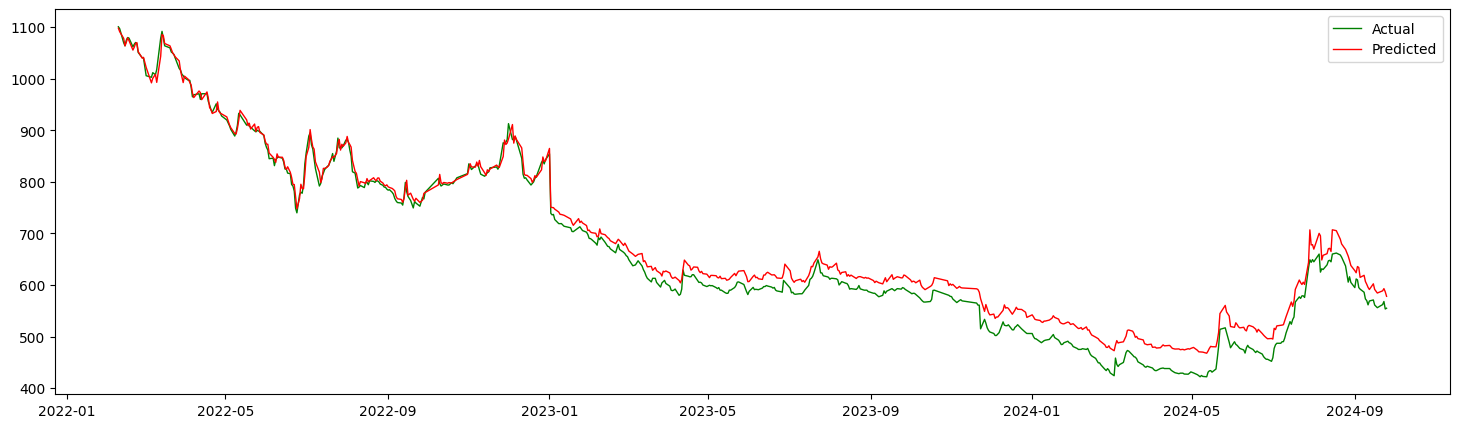

In [16]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()


## Calculating the Performance Evaluation Metrics

In [17]:
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 678.1702809939741
Root Mean Squared Error: 26.041702728392668
Mean Absolute Error: 21.761414129572305


### Here the performance metrics are too much higher so, we have to tune the hyperparameters.

In [18]:
model_params = {
            'C': [0.1, 1, 10, 100, 1000],
            'kernel': ['rbf','linear', 'poly', 'sigmoid'],
            'gamma': [0.01, 0.1, 1, 'auto']
            }


grid_search = GridSearchCV(SVR(), model_params, cv=5, return_train_score=False)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 'auto'],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [19]:
grid_search.best_params_

{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf'}

In [20]:
grid_search.best_score_

0.9961995089694378

In [21]:
grid_search_prediction = grid_search.predict(X_test)
grid_search_prediction

array([1099.49915527, 1093.36241325, 1077.9028307 , 1067.9748812 ,
       1071.42799756, 1079.2685035 , 1079.49631314, 1056.56923578,
       1064.22849002, 1070.41164685, 1071.52493495, 1053.55265975,
       1041.51302315, 1044.99037478, 1021.54114669, 1002.57551611,
       1002.41013764, 1009.41340135, 1002.73984259, 1057.38068441,
       1087.38987504, 1083.62584908, 1072.15317021, 1064.26861653,
       1057.11827597, 1053.2413235 , 1047.94573001, 1042.9247142 ,
       1032.80555458, 1015.97362255, 1014.13316395,  997.3723845 ,
       1006.67366044,  998.94218003,  994.79991287,  987.76014671,
        974.03780048,  967.63830235,  980.5387564 ,  971.03625835,
        959.58956332,  977.62901249,  963.22393742,  946.1039569 ,
        940.05458465,  931.32381088,  938.71836649,  956.65227146,
        939.09437436,  934.4728658 ,  935.2096936 ,  924.30026272,
        910.02789987,  905.30237073,  893.73128534,  897.0893008 ,
        901.94650932,  925.78230784,  937.68690011,  919.59215

In [23]:
prediction = pd.DataFrame({'Date': df.Date[round(df.shape[0]*0.8):], 'Actual': y_test, 'Predicted': grid_search_prediction})
prediction.set_index('Date', inplace=True)
prediction

,Actual,Predicted
Date,,
2022-02-09,1100.9,1099.499155
2022-02-10,1097.1,1093.362413
2022-02-13,1070.0,1077.902831
2022-02-14,1064.0,1067.974881
2022-02-15,1075.0,1071.427998
...,...,...
2024-09-18,556.0,567.956571
2024-09-22,562.0,577.713689
2024-09-23,568.0,579.117201


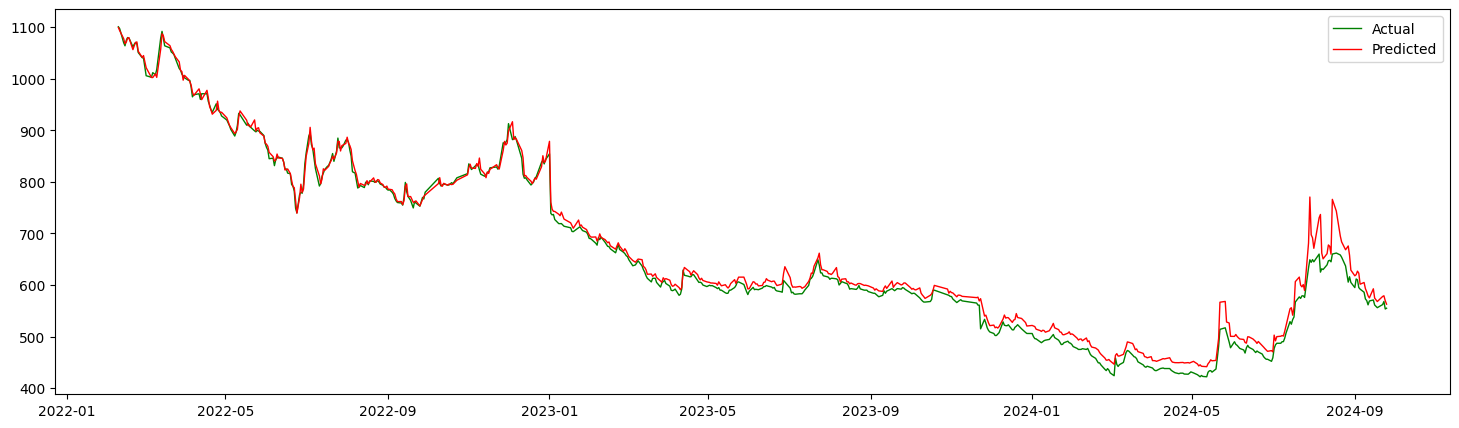

In [24]:
plt.figure(figsize=(18, 5))
plt.plot(prediction.Actual, label='Actual', color='g', linewidth=1)
plt.plot(prediction.Predicted, label='Predicted', color='r', linewidth=1)
plt.legend()
plt.show()


### Performance Evaluation Metrics after Hyperparameter Tuning

In [22]:
mse = mean_squared_error(y_test, grid_search_prediction)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, grid_search_prediction)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)

Mean Squared Error: 290.1858921686688
Root Mean Squared Error: 17.034843473559384
Mean Absolute Error: 12.221067030856947
